# Assignment on Various Filtering Techniques

## Importing the libraries

In [1]:
import cv2
import matplotlib.pyplot as plt

import filters

## Loading the image

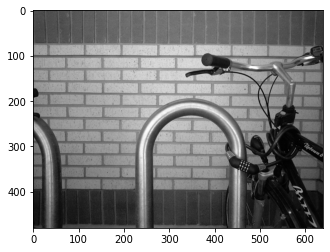

Image shape: (480, 640)


In [2]:
img: cv2.Mat = cv2.imread("../images/bikesgray.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="gray")
plt.show()

print("Image shape:", img.shape)

## Intantiating the `filters.Filters()` class with the image

In [3]:
f = filters.Filters(img)

## 1. Mean Filter

A mean blur (also known as a box linear filter) is a spatial domain linear filter in which each pixel in the resulting image has a value equal to the average value of its neighboring pixels in the input image. It is a form of low-pass ("blurring") filter. A 3 by 3 box blur ("radius 1") can be written as matrix

$$
{1\over 9}
\begin{bmatrix}
1 & 1 & 1\\
1 & 1 & 1\\
1 & 1 & 1
\end{bmatrix}
$$

Due to its property of using equal weights, it can be implemented using a much simpler accumulation algorithm, which is significantly faster than using a sliding-window algorithm.

Box blurs are frequently used to approximate a Gaussian blur. By the central limit theorem, repeated application of a box blur will approximate a Gaussian blur.

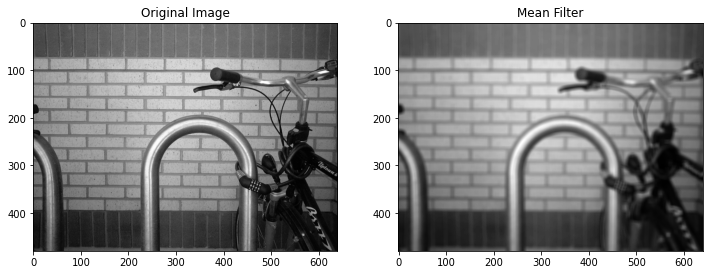

In [4]:
mean = f.mean(9)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(img, cmap="gray")
ax[0].set_title("Original Image")
ax[1].imshow(mean, cmap="gray")
ax[1].set_title("Mean Filter")

plt.show()

## 2. Median Filter

The median filter is a non-linear digital filtering technique, often used to remove noise from an image or signal. Such noise reduction is a typical pre-processing step to improve the results of later processing (for example, edge detection on an image). Median filtering is very widely used in digital image processing because, under certain conditions, it preserves edges while removing noise (but see the discussion below), also having applications in signal processing.

To demonstrate, using a window size of three with one entry immediately preceding and following each entry, a median filter will be applied to the following simple one-dimensional signal:

    x = (2, 3, 80, 6, 2, 3).
So, the median filtered output signal y will be:

    y1 = med(2, 3, 80) = 3, (already 2, 3, and 80 are in the increasing order so no need to arrange them)
    y2 = med(3, 80, 6) = med(3, 6, 80) = 6, (3, 80, and 6 are rearranged to find the median)
    y3 = med(80, 6, 2) = med(2, 6, 80) = 6,
    y4 = med(6, 2, 3) = med(2, 3, 6) = 3,

    y = (3, 6, 6, 3).

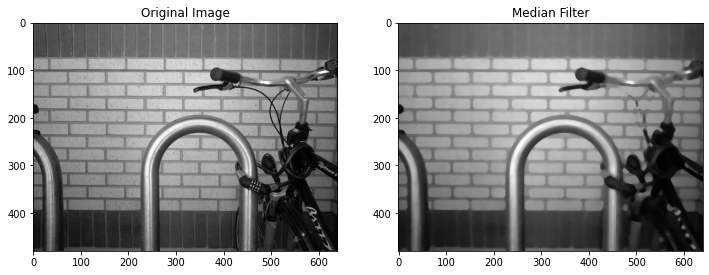

In [5]:
median = f.median(9)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(img, cmap="gray")
ax[0].set_title("Original Image")
ax[1].imshow(median, cmap="gray")
ax[1].set_title("Median Filter")

plt.show()

## 3. Gaussian Filter

In image processing, a Gaussian blur (also known as Gaussian smoothing) is the result of blurring an image by a Gaussian function (named after mathematician and scientist Carl Friedrich Gauss).

Mathematically, applying a Gaussian blur to an image is the same as convolving the image with a Gaussian function. This is also known as a two-dimensional Weierstrass transform.

The Gaussian blur is a type of image-blurring filter that uses a Gaussian function (which also expresses the normal distribution in statistics) for calculating the transformation to apply to each pixel in the image.
In two dimensions, it is the product of two such Gaussian functions, one in each dimension:

$$
\begin{align*}
G(x, y) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{x^2 + y^2}{2\sigma^2}\right)
\end{align*}
$$

where $x$ is the distance from the origin in the horizontal axis, $y$ is the distance from the origin in the vertical axis, and $\sigma$ is the standard deviation of the Gaussian distribution.

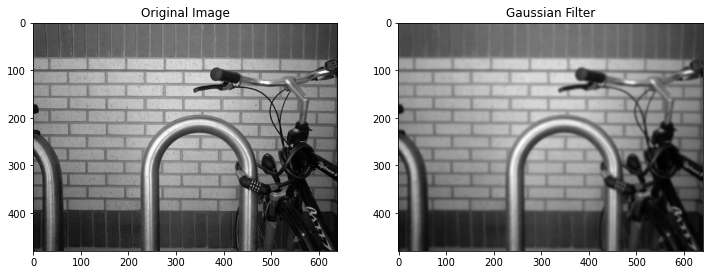

In [6]:
gaussian = f.gaussian(10, 2)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(img, cmap="gray")
ax[0].set_title("Original Image")
ax[1].imshow(gaussian, cmap="gray")
ax[1].set_title("Gaussian Filter")

plt.show()

## 4. Laplacian Filter

Approximations of the Laplacian, obtained by the finite-difference method or by the finite-element method, can also be called **discrete Laplacians**. For example, the Laplacian in two dimensions can be approximated using the five-point stencil finite-difference method, resulting in

$$
\begin{align*}
L(x, y) = \begin{bmatrix}
-1 & -1 & -1\\
-1 & 8 & -1\\
-1 & -1 & -1
\end{bmatrix}
\cdot I(x, y)
\end{align*}
$$

where $I$ is the input image.

The $3×3$ Laplacian filter with positive center value is defined as:

$$
\begin{align*}
L(x, y) = \begin{bmatrix}
0 & -1 & 0\\
-1 & 4 & -1\\
0 & -1 & 0
\end{bmatrix}
\cdot I(x, y)
\end{align*}
$$

The $3×3$ Laplacian filter with negative center value is defined as:

$$
\begin{align*}
L(x, y) = \begin{bmatrix}
0 & 1 & 0\\
1 & -4 & 1\\
0 & 1 & 0
\end{bmatrix}
\cdot I(x, y)
\end{align*}
$$

Where $I(x, y)$ is the input image, and $L(x, y)$ is the output image.

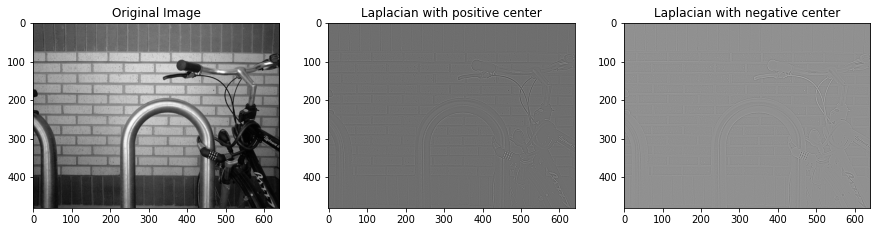

Minimum value for positive center: 0
Maximum value for positive center: 255
Minimum value for negative center: 0
Maximum value for negative center: 255


In [7]:
laplacian = f.laplacian()
p_laplacian, n_laplacian = laplacian

fig, ax = plt.subplots(1, 3, figsize=(15, 6))
ax[0].imshow(img, cmap="gray")
ax[0].set_title("Original Image")
ax[1].imshow(p_laplacian, cmap="gray")
ax[1].set_title("Laplacian with positive center")
ax[2].imshow(n_laplacian, cmap="gray")
ax[2].set_title("Laplacian with negative center")

plt.show()

print("Minimum value for positive center:", p_laplacian.min())
print("Maximum value for positive center:", p_laplacian.max())
print("Minimum value for negative center:", n_laplacian.min())
print("Maximum value for negative center:", n_laplacian.max())

## 5. Sobel Filter

The Sobel operator, sometimes called the Sobel–Feldman operator or Sobel filter, is used in image processing and computer vision, particularly within edge detection algorithms where it creates an image emphasising edges.

The operator uses two $3×3$ kernels which are convolved with the original image to calculate approximations of the derivatives – one for horizontal changes, and one for vertical. If we define **A** as the source image, and $G_x$ and $G_y$ are two images which at each point contain the horizontal and vertical derivative approximations respectively, the computations are as follows:

$$
\begin{align*}
G_x = \begin{bmatrix}
-1 & 0 & 1\\
-2 & 0 & 2\\
-1 & 0 & 1
\end{bmatrix}
* A
\end{align*}
$$

$$
\begin{align*}
G_y = \begin{bmatrix}
-1 & -2 & -1\\
0 & 0 & 0\\
1 & 2 & 1
\end{bmatrix}
* A
\end{align*}
$$

where **\*** here denotes the 2-dimensional signal processing convolution operation.

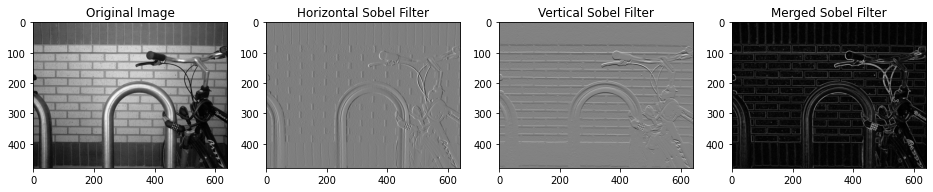

In [8]:
sobel = f.sobel()
sobel_x, sobel_y, merged = sobel

fig, ax = plt.subplots(1, 4, figsize=(16, 6))
ax[0].imshow(img, cmap="gray")
ax[0].set_title("Original Image")
ax[1].imshow(sobel_x, cmap="gray")
ax[1].set_title("Horizontal Sobel Filter")
ax[2].imshow(sobel_y, cmap="gray")
ax[2].set_title("Vertical Sobel Filter")
ax[3].imshow(merged, cmap="gray")
ax[3].set_title("Merged Sobel Filter")

plt.show()

## 6. Scharr Filter

The Sobel–Feldman operator, while reducing artifacts associated with a pure central differences operator, does not exhibit a good rotational symmetry (about 1° of error). Scharr looked into optimizing this property by producing kernels optimized for specific given numeric precision (integer, float…) and dimensionalities (1D, 2D, 3D). Optimized 3D filter kernels up to a size of 5 x 5 x 5 have been presented there, but the most frequently used, with an error of about 0.2° is:

$$
\begin{align*}
G_x = \begin{bmatrix}
3 & 0 & -3\\
10 & 0 & -10\\
3 & 0 & -3
\end{bmatrix}
\end{align*}
$$

$$
\begin{align*}
G_y = \begin{bmatrix}
3 & 10 & 3\\
0 & 0 & 0\\
-3 & -10 & -3
\end{bmatrix}
\end{align*}
$$


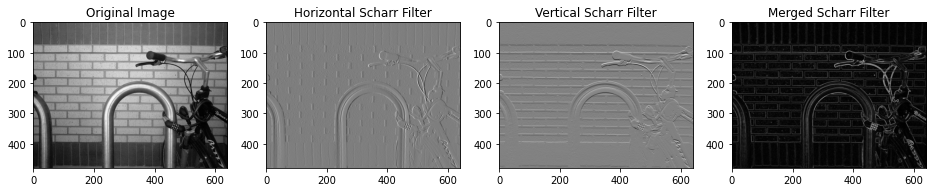

In [9]:
scharr = f.scharr()
scharr_x, scharr_y, merged = scharr

fig, ax = plt.subplots(1, 4, figsize=(16, 6))
ax[0].imshow(img, cmap="gray")
ax[0].set_title("Original Image")
ax[1].imshow(scharr_x, cmap="gray")
ax[1].set_title("Horizontal Scharr Filter")
ax[2].imshow(scharr_y, cmap="gray")
ax[2].set_title("Vertical Scharr Filter")
ax[3].imshow(merged, cmap="gray")
ax[3].set_title("Merged Scharr Filter")

plt.show()

## 7. Prewitt Filter

The Prewitt operator is used in image processing, particularly within edge detection algorithms. Technically, it is a discrete differentiation operator, computing an approximation of the gradient of the image intensity function.

In simple terms, the operator calculates the gradient of the image intensity at each point, giving the direction of the largest possible increase from light to dark and the rate of change in that direction. The result therefore shows how "abruptly" or "smoothly" the image changes at that point, and therefore how likely it is that part of the image represents an edge, as well as how that edge is likely to be oriented. In practice, the magnitude (likelihood of an edge) calculation is more reliable and easier to interpret than the direction calculation.

Mathematically, the operator uses two $3×3$ kernels which are convolved with the original image to calculate approximations of the derivatives - one for horizontal changes, and one for vertical. If we define $\mathbf {A}$  as the source image, and $\mathbf {G_{x}}$  and $\mathbf {G_{y}}$  are two images which at each point contain the horizontal and vertical derivative approximations, the latter are computed as:

$$
\begin{align*}
G_{x} = \begin{bmatrix}
-1 & 0 & 1\\
-1 & 0 & 1\\
-1 & 0 & 1
\end{bmatrix}
* A
\end{align*}
$$

$$
\begin{align*}
G_{y} = \begin{bmatrix}
-1 & -1 & -1\\
0 & 0 & 0\\
1 & 1 & 1
\end{bmatrix}
* A
\end{align*}
$$

where **\*** here denotes the 2-dimensional signal processing convolution operation.


Since the Prewitt kernels can be decomposed as the products of an averaging and a differentiation kernel, they compute the gradient with smoothing. Therefore, it is a separable filter. For example, $\mathbf {G_{x}}$  can be written as

$$
\begin{align*}
\begin{bmatrix}
1 & 0 & -1\\
1 & 0 & -1\\
1 & 0 & -1
\end{bmatrix}
= 
\begin{bmatrix}
1\\
1\\
1
\end{bmatrix}
\cdot
\begin{bmatrix}
1 & 0 & -1
\end{bmatrix}
\end{align*}
$$


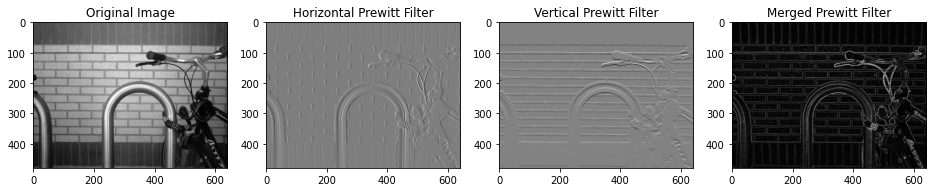

In [10]:
prewitt = f.prewitt()
prewitt_x, prewitt_y, merged = prewitt

fig, ax = plt.subplots(1, 4, figsize=(16, 6))
ax[0].imshow(img, cmap="gray")
ax[0].set_title("Original Image")
ax[1].imshow(prewitt_x, cmap="gray")
ax[1].set_title("Horizontal Prewitt Filter")
ax[2].imshow(prewitt_y, cmap="gray")
ax[2].set_title("Vertical Prewitt Filter")
ax[3].imshow(merged, cmap="gray")
ax[3].set_title("Merged Prewitt Filter")

plt.show()

## 8. Roberts Filter

The Roberts cross operator is used in image processing and computer vision for edge detection. It was one of the first edge detectors and was initially proposed by Lawrence Roberts in 1963. As a differential operator, the idea behind the Roberts cross operator is to approximate the gradient of an image through discrete differentiation which is achieved by computing the sum of the squares of the differences between diagonally adjacent pixels.

According to Roberts, an edge detector should have the following properties: the produced edges should be well-defined, the background should contribute as little noise as possible, and the intensity of edges should correspond as close as possible to what a human would perceive. With these criteria in mind and based on then prevailing psychophysical theory Roberts proposed the following equations:

$$
\begin{align*}
y_{i, j} = \sqrt{x_{i, j}}
\end{align*}
$$
$$
\begin{align*}
z_{i, j} = \sqrt{(y_{i, j} + y_{i+1, j+1})^2 + (y_{i+1, j} + y_{i, j+1})^2}
\end{align*}
$$

where $x$ is the initial intensity value in the image, $z$ is the computed derivative and $i,j$ represent the location in the image.

In order to perform edge detection with the Roberts operator we first convolve the original image, with the following two kernels:

$$
\begin{align*}
\begin{bmatrix}
1 & 0\\
0 & -1
\end{bmatrix}
and 
\begin{bmatrix}
0 & 1\\
-1 & 0
\end{bmatrix}
\end{align*}
$$


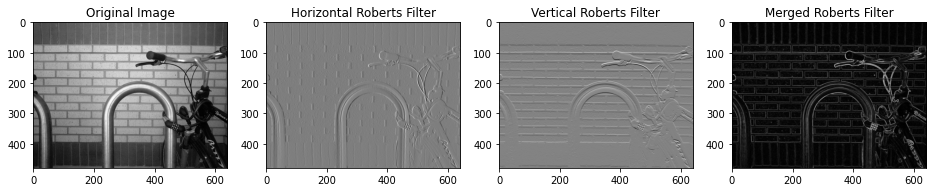

In [11]:
roberts = f.roberts()
roberts_x, roberts_y, merged = roberts

fig, ax = plt.subplots(1, 4, figsize=(16, 6))
ax[0].imshow(img, cmap="gray")
ax[0].set_title("Original Image")
ax[1].imshow(roberts_x, cmap="gray")
ax[1].set_title("Horizontal Roberts Filter")
ax[2].imshow(roberts_y, cmap="gray")
ax[2].set_title("Vertical Roberts Filter")
ax[3].imshow(merged, cmap="gray")
ax[3].set_title("Merged Roberts Filter")

plt.show()